In [1]:
import numpy as np
import matplotlib.pyplot as plt

6.1

0.3171766839496418
0.5068644919793387
0.5070836437909231


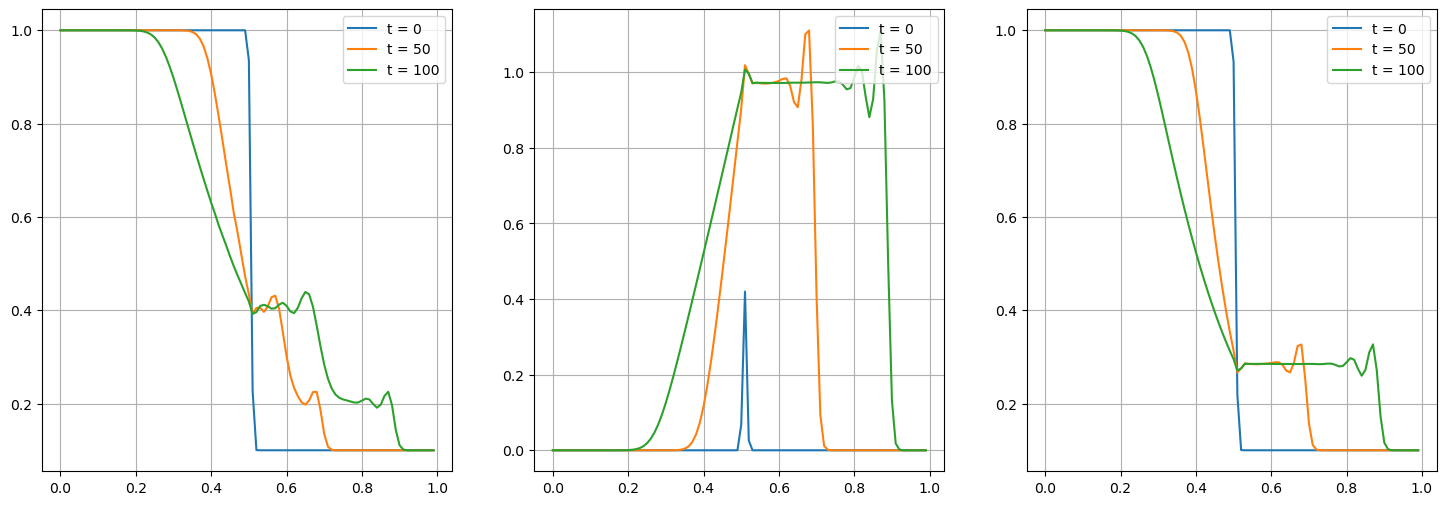

In [43]:
dt = 0.002
dx = 0.01
x = np.arange(0.0, 1.0, dx)
nmax = len(x)
eps_c = 0.2

gamma = 1.4

p_left = 1.0
rho_left = 1.0
u_left = 0.0
p_right = 0.1
rho_right = 0.1
u_right = 0.0

Q = np.zeros([nmax, 3])
Q[x <= 0.5, 0] = rho_left
Q[x > 0.5, 0] = rho_right
Q[x <= 0.5, 1] = rho_left * u_left
Q[x > 0.5, 1] = rho_right * u_right
Q[x <= 0.5, 2] = p_left / (gamma - 1) + 1/2 * rho_left * u_left**2
Q[x > 0.5, 2] = p_right / (gamma - 1) + 1/2 * rho_right * u_right**2

Q_tmp = Q.copy()
E = np.zeros(Q.shape)

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

tmax = 100
for t in range(tmax+1):
    Q_old = Q.copy()

    rho = Q[:, 0]
    u = Q[:, 1] / rho 
    e = Q[:, 2]
    p = (gamma - 1) * (e - 1/2 * rho * u**2)
    E[:, 0] = rho * u 
    E[:, 1] = p + rho * u**2
    E[:, 2] = (e + p) * u
    for i in range(1, nmax-1):
        Q_tmp[i, :] = Q_old[i, :] - dt/dx * (E[i, :] - E[i-1, :])
    
    rho = Q_tmp[:, 0]
    u = Q_tmp[:, 1] / rho 
    e = Q_tmp[:, 2]
    p = (gamma - 1) * (e - 1/2 * rho * u**2)
    E[:, 0] = rho * u 
    E[:, 1] = p + rho * u**2
    E[:, 2] = (e + p) * u
    for i in range(1, nmax-1):
        Q[i, :] = 1/2 * (Q_old[i, :] + Q_tmp[i, :]) - 1/2 * dt/dx * (E[i+1, :] - E[i, :])
    
    Q_tmp = Q.copy()
    for i in range(1, nmax-1):
        D1 = Q_tmp[i-1, :] - 2.0*Q_tmp[i, :] + Q_tmp[i+1, :]
        D2 = Q_tmp[i-1, :] + 2.0*Q_tmp[i, :] + Q_tmp[i+1, :]
        kappa = eps_c * np.linalg.norm(D1) / np.linalg.norm(D2)
        Q[i, :] += kappa * D1
    
    if t % 50 == 0:
        rho = Q[:, 0]
        u = Q[:, 1] / rho 
        e = Q[:, 2]
        p = (gamma - 1) * (e - 1/2 * rho * u**2)
        c = np.sqrt(gamma * p / rho)
        print(np.max(c + np.abs(u)) * dt / dx)

        ax1.plot(x, rho, label=f't = {t}')
        ax2.plot(x, u, label=f't = {t}')
        ax3.plot(x, p, label=f't = {t}')


ax1.grid()
ax2.grid()
ax3.grid()
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
plt.show()

0.4118675509658851
nan
nan


C:\Users\keita\AppData\Local\Temp\ipykernel_21664\3779220718.py:52: RuntimeWarning: overflow encountered in multiply
  E[:, 2] = (e + p) * u
C:\Users\keita\AppData\Local\Temp\ipykernel_21664\3779220718.py:54: RuntimeWarning: invalid value encountered in subtract
  Q[i, :] = 1/2 * (Q_old[i, :] + Q_tmp[i, :]) - 1/2 * dt/dx * (E[i+1, :] - E[i, :])
C:\Users\keita\AppData\Local\Temp\ipykernel_21664\3779220718.py:39: RuntimeWarning: overflow encountered in multiply
  p = (gamma - 1) * (e - 1/2 * rho * u**2)
C:\Users\keita\AppData\Local\Temp\ipykernel_21664\3779220718.py:39: RuntimeWarning: invalid value encountered in subtract
  p = (gamma - 1) * (e - 1/2 * rho * u**2)
C:\Users\keita\AppData\Local\Temp\ipykernel_21664\3779220718.py:41: RuntimeWarning: overflow encountered in multiply
  E[:, 1] = p + rho * u**2
C:\Users\keita\AppData\Local\Temp\ipykernel_21664\3779220718.py:41: RuntimeWarning: invalid value encountered in add
  E[:, 1] = p + rho * u**2
C:\Users\keita\AppData\Local\Temp\ipyker

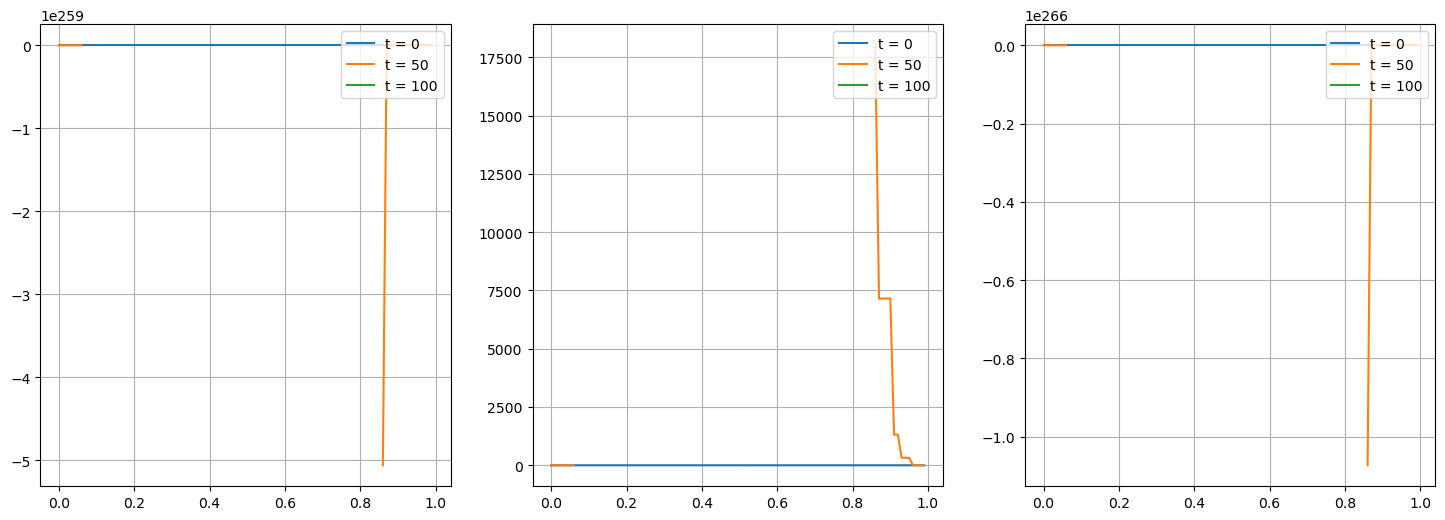

In [44]:
dt = 0.002
dx = 0.01
x = np.arange(0.0, 1.0, dx)
nmax = len(x)
eps_c = 0.2

gamma = 1.4

p_left = 1.0
rho_left = 1.0
u_left = 0.0
p_right = 0.1
rho_right = 0.1
u_right = 0.0

Q = np.zeros([nmax, 3])
Q[x <= 0.5, 0] = rho_left
Q[x > 0.5, 0] = rho_right
Q[x <= 0.5, 1] = rho_left * u_left
Q[x > 0.5, 1] = rho_right * u_right
Q[x <= 0.5, 2] = p_left / (gamma - 1) + 1/2 * rho_left * u_left**2
Q[x > 0.5, 2] = p_right / (gamma - 1) + 1/2 * rho_right * u_right**2

Q_tmp = Q.copy()
E = np.zeros(Q.shape)

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

tmax = 100
for t in range(tmax+1):
    Q_old = Q.copy()

    rho = Q[:, 0]
    u = Q[:, 1] / rho 
    e = Q[:, 2]
    p = (gamma - 1) * (e - 1/2 * rho * u**2)
    E[:, 0] = rho * u 
    E[:, 1] = p + rho * u**2
    E[:, 2] = (e + p) * u
    for i in range(1, nmax-1):
        Q_tmp[i, :] = Q_old[i, :] - dt/dx * (E[i, :] - E[i-1, :])
    
    rho = Q_tmp[:, 0]
    u = Q_tmp[:, 1] / rho 
    e = Q_tmp[:, 2]
    p = (gamma - 1) * (e - 1/2 * rho * u**2)
    E[:, 0] = rho * u 
    E[:, 1] = p + rho * u**2
    E[:, 2] = (e + p) * u
    for i in range(1, nmax-1):
        Q[i, :] = 1/2 * (Q_old[i, :] + Q_tmp[i, :]) - 1/2 * dt/dx * (E[i+1, :] - E[i, :])
    
    #Q_tmp = Q.copy()
    #for i in range(1, nmax-1):
    #    D1 = Q_tmp[i-1, :] - 2.0*Q_tmp[i, :] + Q_tmp[i+1, :]
    #    D2 = Q_tmp[i-1, :] + 2.0*Q_tmp[i, :] + Q_tmp[i+1, :]
    #    kappa = eps_c * np.linalg.norm(D1) / np.linalg.norm(D2)
    #    Q[i, :] += kappa * D1
    
    if t % 50 == 0:
        rho = Q[:, 0]
        u = Q[:, 1] / rho 
        e = Q[:, 2]
        p = (gamma - 1) * (e - 1/2 * rho * u**2)
        c = np.sqrt(gamma * p / rho)
        print(np.max(c + np.abs(u)) * dt / dx)

        ax1.plot(x, rho, label=f't = {t}')
        ax2.plot(x, u, label=f't = {t}')
        ax3.plot(x, p, label=f't = {t}')


ax1.grid()
ax2.grid()
ax3.grid()
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
plt.show()